## Plotly Group 1

In [29]:
import pandas as pd
import plotly.express as px

In [30]:
airbnb_ny_df=pd.read_csv("AB_NYC_2019.csv")

In [31]:
airbnb_ny_df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [32]:
missing_values = airbnb_ny_df.isnull().sum()  # Count missing values in each column
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [33]:
airbnb_ny_cleaned = airbnb_ny_df.dropna(subset=['name', 'host_name','last_review','reviews_per_month'])
airbnb_ny_cleaned

id                                              name    host_id  \
0          2539                Clean & quiet apt home by the park       2787   
1          2595                             Skylit Midtown Castle       2845   
3          3831                   Cozy Entire Floor of Brownstone       4869   
4          5022  Entire Apt: Spacious Studio/Loft by central park       7192   
5          5099         Large Cozy 1 BR Apartment In Midtown East       7322   
...         ...                                               ...        ...   
48782  36425863        Lovely Privet Bedroom with Privet Restroom   83554966   
48790  36427429                          No.2 with queen size bed  257683179   
48799  36438336                                   Seas The Moment  211644523   
48805  36442252                     1B-1B apartment near by Metro  273841667   
48852  36455809           Cozy Private Room in Bushwick, Brooklyn   74162901   

         host_name neighbourhood_group    neighbourhood  latitude  longitude  \
0             John            Brooklyn       Kensington  40.64749  -73.97237   
1         Jennifer           Manhattan          Midtown  40.75362  -73.98377   
3      LisaRoxanne            Brooklyn     Clinton Hill  40.68514  -73.95976   
4            Laura           Manhattan      East Harlem  40.79851  -73.94399   
5            Chris           Manhattan      Murray Hill  40.74767  -73.97500   
...            ...                 ...              ...       ...        ...   
48782        Rusaa           Manhattan  Upper East Side  40.78099  -73.95366   
48790         H Ai              Queens         Flushing  40.75104  -73.81459   
48799          Ben       Staten Island      Great Kills  40.54179  -74.14275   
48805       Blaine               Bronx       Mott Haven  40.80787  -73.92400   
48852    Christine            Brooklyn         Bushwick  40.69805  -73.92801   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room    149               1                  9  2018-10-19   
1      Entire home/apt    225               1                 45  2019-05-21   
3      Entire home/apt     89               1                270  2019-07-05   
4      Entire home/apt     80              10                  9  2018-11-19   
5      Entire home/apt    200               3                 74  2019-06-22   
...                ...    ...             ...                ...         ...   
48782     Private room    129               1                  1  2019-07-07   
48790     Private room     45               1                  1  2019-07-07   
48799     Private room    235               1                  1  2019-07-07   
48805  Entire home/apt    100               1                  2  2019-07-07   
48852     Private room     30               1                  1  2019-07-08   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.21                               6               365  
1                   0.38                               2               355  
3                   4.64                               1               194  
4                   0.10                               1                 0  
5                   0.59                               1               129  
...                  ...                             ...               ...  
48782               1.00                               1               147  
48790               1.00                               6               339  
48799               1.00                               1                87  
48805               2.00                               1                40  
48852               1.00                               1                 1  

[38821 rows x 16 columns]

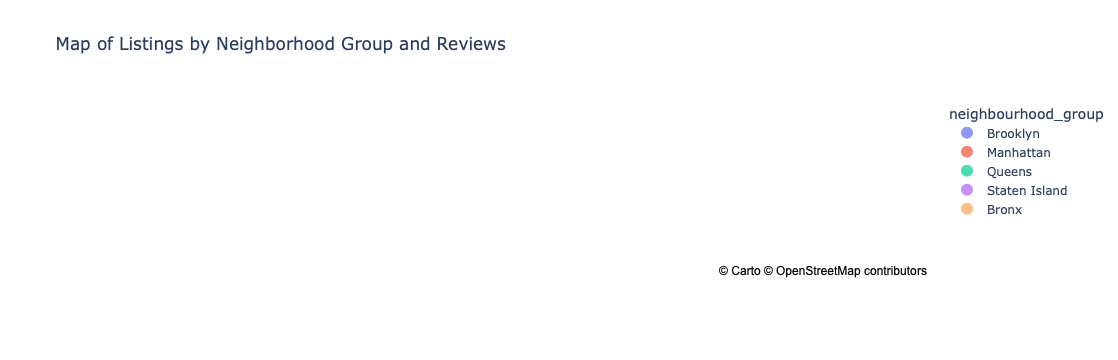

In [34]:
fig = px.scatter_mapbox(airbnb_ny_cleaned, lat='latitude', lon='longitude', color='neighbourhood_group', size='price', 
                        title='Map of Listings by Neighborhood Group and Reviews',
                        mapbox_style="carto-positron",
                        center={'lat': 40.7128, 'lon': -74.0060}, # Centering on New York City
                        zoom=10)  # Adjust zoom level for city-wide view
fig.show()

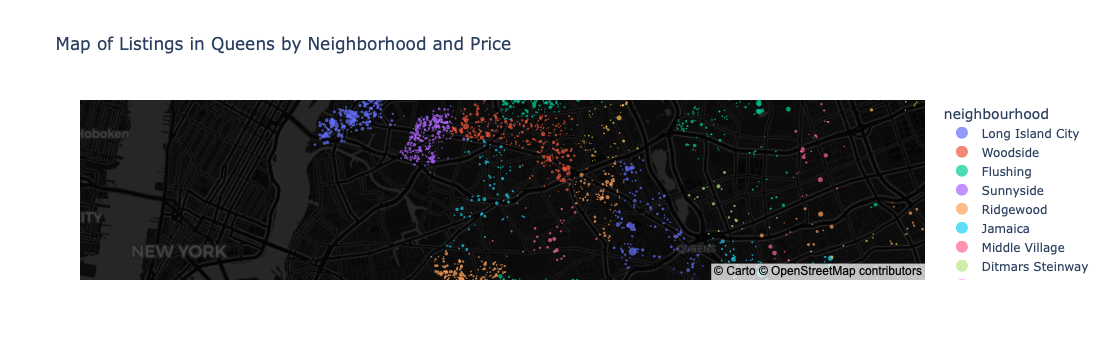

In [35]:
df_queens = airbnb_ny_cleaned[airbnb_ny_cleaned['neighbourhood_group'] == 'Queens']

fig = px.scatter_mapbox(df_queens, lat='latitude', lon='longitude', color='neighbourhood', size='price', 
                        title='Map of Listings in Queens by Neighborhood and Price',
                        mapbox_style="carto-darkmatter",
                        center={'lat': 40.7285, 'lon': -73.8949},  
                        zoom=11)  
fig.show()

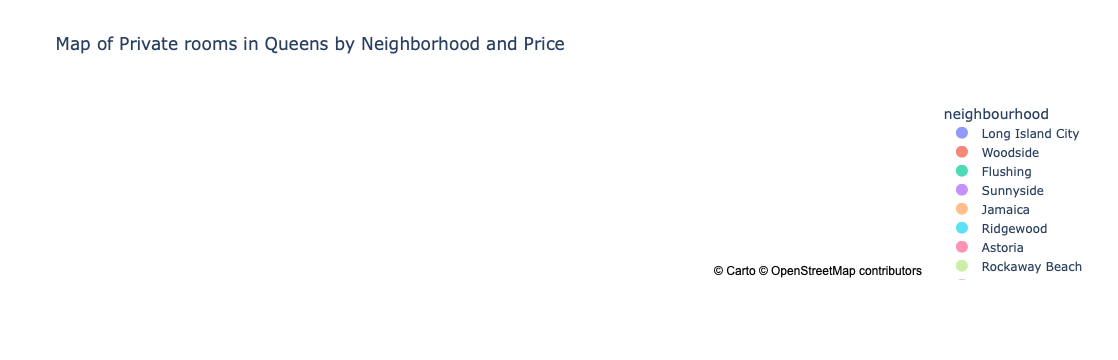

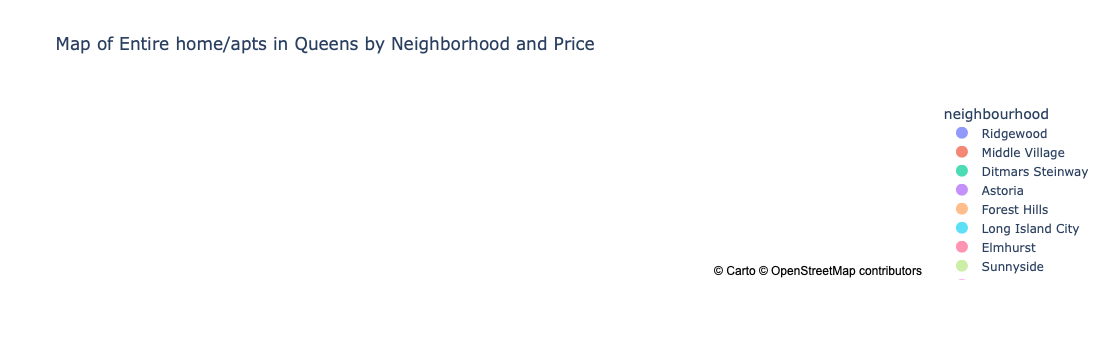

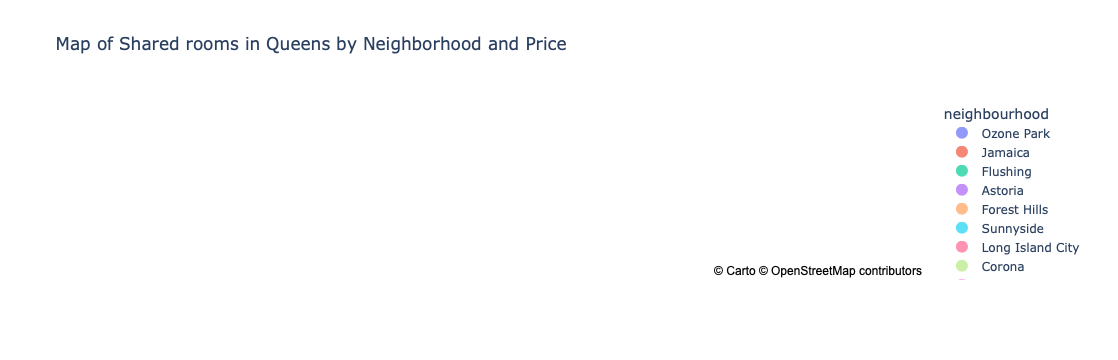

In [36]:
def create_map_for_room_type(room_type):
    df_room_type = df_queens[df_queens['room_type'] == room_type]
    
    fig = px.scatter_mapbox(
        df_room_type, 
        lat='latitude', 
        lon='longitude', 
        color='neighbourhood', 
        size='price',
        hover_name='name',
        hover_data={
            'price': True, 
            'room_type': True, 
            'number_of_reviews': True, 
            'availability_365': True
        },
        title=f'Map of {room_type}s in Queens by Neighborhood and Price',
        mapbox_style="carto-darkmatter",
        center={'lat': 40.7282, 'lon': -73.7949},  # Centering on Queens
        zoom=10,
        size_max=15
    )
    fig.show()

# List of unique room types
room_types = df_queens['room_type'].unique()

# Loop through room types and create a map for each
for room_type in room_types:
    create_map_for_room_type(room_type)

/var/folders/7h/qf4rtmzs58b6gr0_s15mxthh0000gn/T/ipykernel_1248/2835988349.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



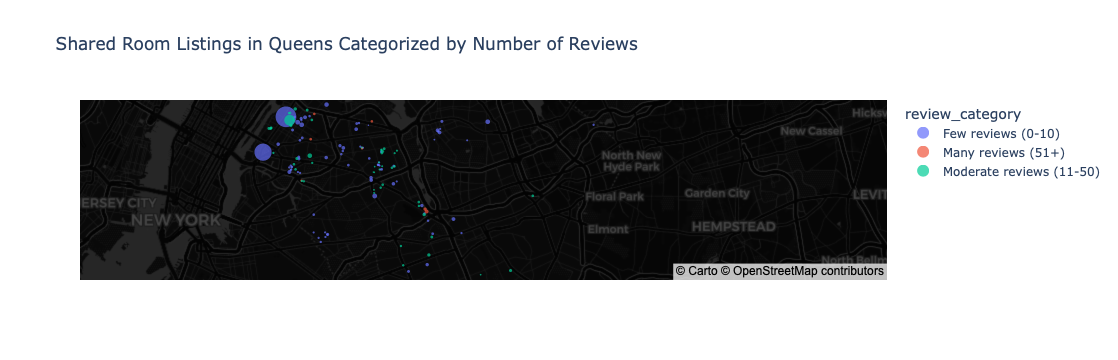

In [37]:
df_shared_rooms = airbnb_ny_cleaned[(airbnb_ny_cleaned['neighbourhood_group'] == 'Queens') & (airbnb_ny_cleaned['room_type'] == 'Shared room')]


bins = [0, 10, 50, float('inf')]  
labels = ['Few reviews (0-10)', 'Moderate reviews (11-50)', 'Many reviews (51+)'] 
df_shared_rooms['review_category'] = pd.cut(df_shared_rooms['number_of_reviews'], bins=bins, labels=labels, include_lowest=True)


fig = px.scatter_mapbox(
    df_shared_rooms, 
    lat='latitude', 
    lon='longitude', 
    color='review_category',  
    size='price', 
    hover_name='name',
    hover_data={
        'price': True, 
        'number_of_reviews': True, 
        'availability_365': True
    },
    title='Shared Room Listings in Queens Categorized by Number of Reviews',
    mapbox_style="carto-darkmatter",  
    center={'lat': 40.7282, 'lon': -73.7949},  
    zoom=10,
    size_max=15
)

fig.show()

/var/folders/7h/qf4rtmzs58b6gr0_s15mxthh0000gn/T/ipykernel_1248/1507653658.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



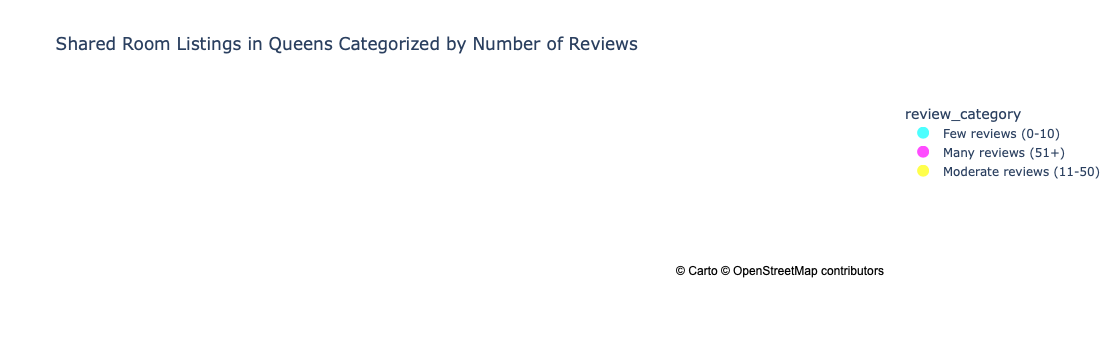

In [38]:
df_shared_rooms = airbnb_ny_cleaned[(airbnb_ny_cleaned['neighbourhood_group'] == 'Queens') & (airbnb_ny_cleaned['room_type'] == 'Shared room')]


bins = [0, 10, 50, float('inf')] 
labels = ['Few reviews (0-10)', 'Moderate reviews (11-50)', 'Many reviews (51+)'] 
df_shared_rooms['review_category'] = pd.cut(df_shared_rooms['number_of_reviews'], bins=bins, labels=labels, include_lowest=True)


custom_colors = {
    'Few reviews (0-10)': '#00FFFF',   
    'Moderate reviews (11-50)': '#FFFF00',   
    'Many reviews (51+)': '#FF00FF'    
}


fig = px.scatter_mapbox(
    df_shared_rooms, 
    lat='latitude', 
    lon='longitude', 
    color='review_category',  
    size='price', 
    color_discrete_map=custom_colors, 
    hover_name='name',
    hover_data={
        'price': True, 
        'number_of_reviews': True, 
        'availability_365': True
    },
    title='Shared Room Listings in Queens Categorized by Number of Reviews',
    mapbox_style="carto-darkmatter",  
    center={'lat': 40.7282, 'lon': -73.7949},  
    zoom=11,
    size_max=17
)

fig.show()

## Plotly Group 2

In [40]:
import pandas as pd
import plotly.express as px

In [41]:
SP = pd.read_csv("S&P.csv",header=1)

In [42]:
SP

Year  S&P 500  Dividends Dividend Yield T.Bond rate Return on bond  \
0    1927.0    17.66       0.62          3.50%       3.17%            NaN   
1    1928.0    24.35       1.05          4.30%       3.45%          0.84%   
2    1929.0    21.45       0.88          4.10%       3.36%          4.20%   
3    1930.0    15.34       0.72          4.70%       3.22%          4.54%   
4    1931.0     8.12       0.50          6.10%       3.93%         -2.56%   
..      ...      ...        ...            ...         ...            ...   
175     NaN      NaN        NaN            NaN         NaN            NaN   
176     NaN      NaN        NaN            NaN         NaN            NaN   
177     NaN      NaN        NaN            NaN         NaN            NaN   
178     NaN      NaN        NaN            NaN         NaN            NaN   
179     NaN      NaN        NaN            NaN         NaN            NaN   

    Aaa Bond Rate Return on Aaa  Baa Bond Rate Return on Baa   \
0           4.46%            NaN         5.32%            NaN   
1           4.61%          3.28%         5.60%          3.22%   
2           4.67%          4.14%         5.95%          3.02%   
3           4.52%          5.86%         6.71%          0.54%   
4           5.32%         -1.56%        10.42%        -15.68%   
..            ...            ...           ...            ...   
175           NaN            NaN           NaN            NaN   
176           NaN            NaN           NaN            NaN   
177           NaN            NaN           NaN            NaN   
178           NaN            NaN           NaN            NaN   
179           NaN            NaN           NaN            NaN   

    Returns on Real Estate  Unnamed: 11  
0                      NaN          NaN  
1                    1.49%          NaN  
2                   -2.06%          NaN  
3                   -4.30%          NaN  
4                   -8.15%          NaN  
..                     ...          ...  
175                    NaN          NaN  
176                    NaN          NaN  
177                    NaN          NaN  
178                    NaN          NaN  
179                    NaN          NaN  

[180 rows x 12 columns]

In [43]:
SP = SP.drop(columns = "Unnamed: 11")

In [44]:
SP.head()

Year  S&P 500  Dividends Dividend Yield T.Bond rate Return on bond  \
0  1927.0    17.66       0.62          3.50%       3.17%            NaN   
1  1928.0    24.35       1.05          4.30%       3.45%          0.84%   
2  1929.0    21.45       0.88          4.10%       3.36%          4.20%   
3  1930.0    15.34       0.72          4.70%       3.22%          4.54%   
4  1931.0     8.12       0.50          6.10%       3.93%         -2.56%   

  Aaa Bond Rate Return on Aaa  Baa Bond Rate Return on Baa   \
0         4.46%            NaN         5.32%            NaN   
1         4.61%          3.28%         5.60%          3.22%   
2         4.67%          4.14%         5.95%          3.02%   
3         4.52%          5.86%         6.71%          0.54%   
4         5.32%         -1.56%        10.42%        -15.68%   

  Returns on Real Estate  
0                    NaN  
1                  1.49%  
2                 -2.06%  
3                 -4.30%  
4                 -8.15%

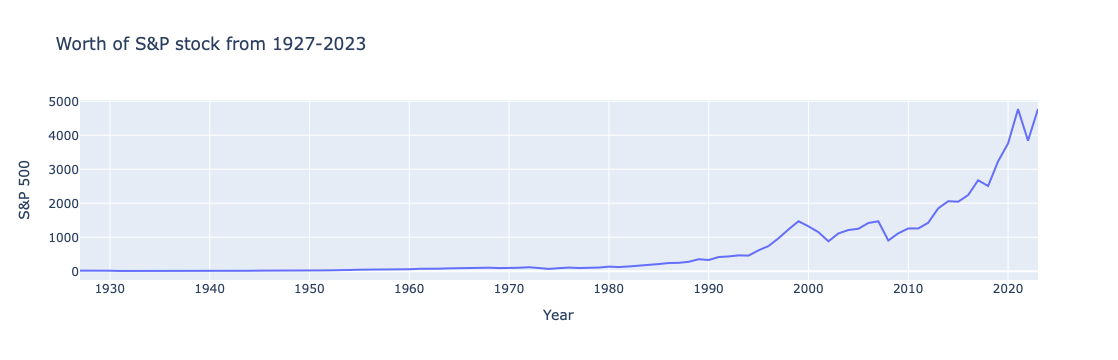

In [45]:
fig = px.line(SP, x="Year", y="S&P 500", title='Worth of S&P stock from 1927-2023')
fig.show()

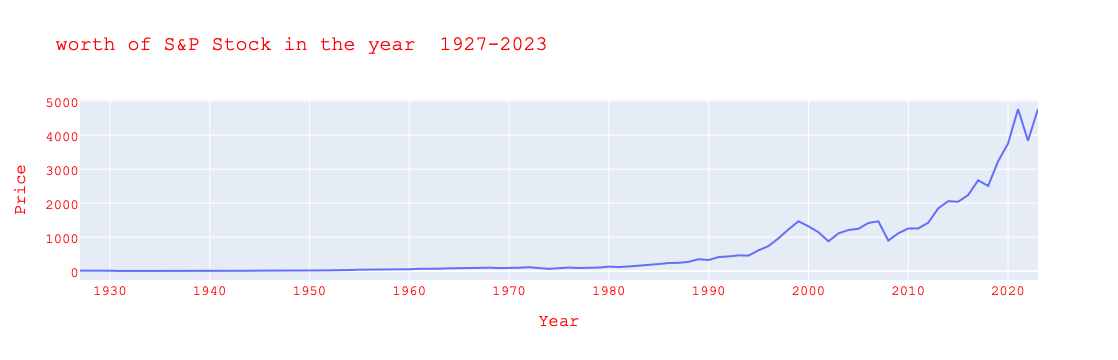

In [46]:
fig.update_layout(
    title="worth of S&P Stock in the year  1927-2023",
    xaxis_title="Year",
    yaxis_title="Price",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="red"
    )
)

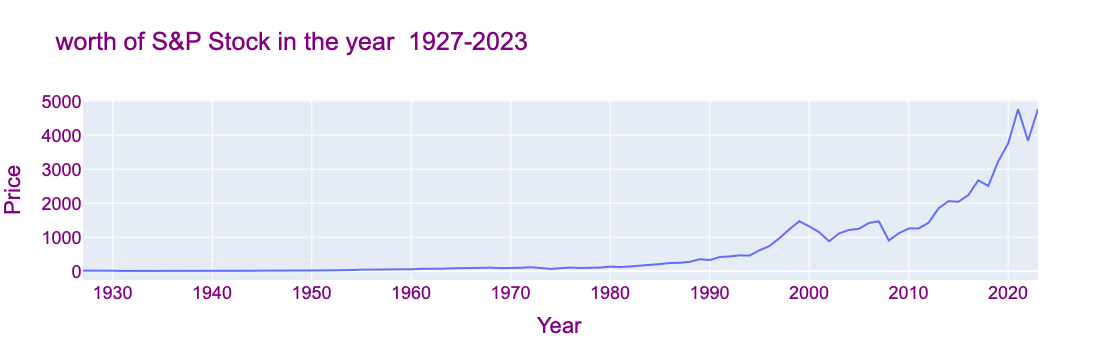

In [47]:
fig.update_layout(
    font=dict(
        family="Arial",
        size=18,
        color="purple"
    )
)

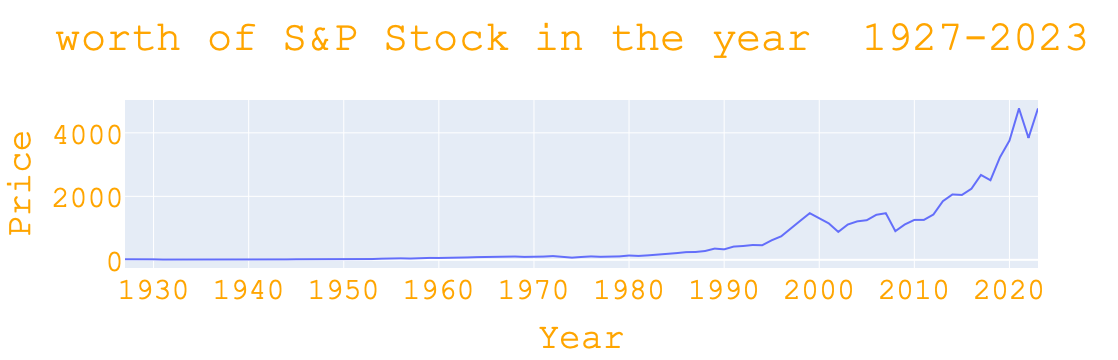

In [48]:
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=30,
        color="orange"
    )
)

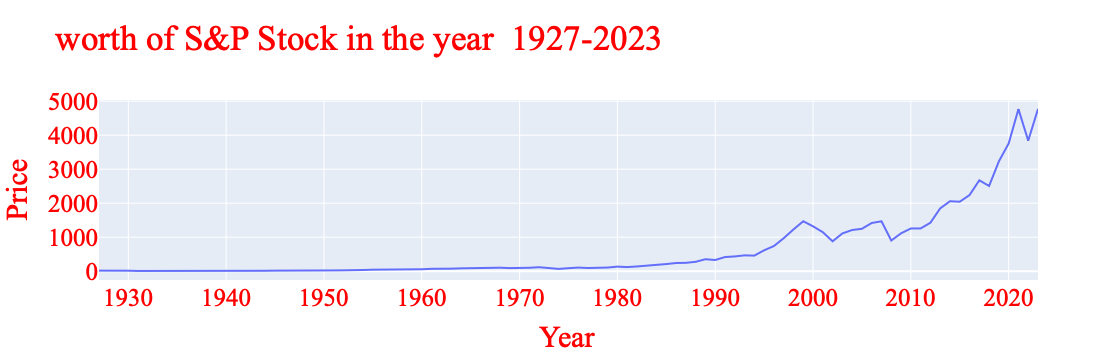

In [49]:
fig.update_layout(
    font=dict(
        family="Times New Roman",
        size=25,
        color="red"
    )
)

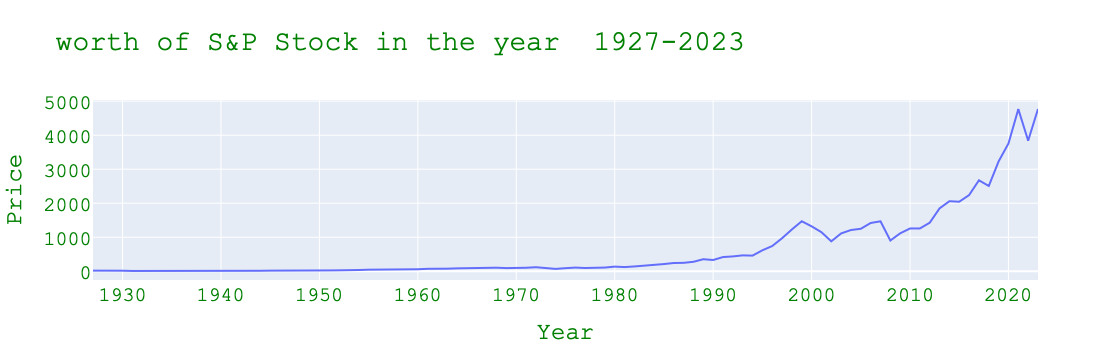

In [50]:
fig.update_layout(
    font=dict(
        family="Courier New",
        size=20,
        color="green"
    )
)

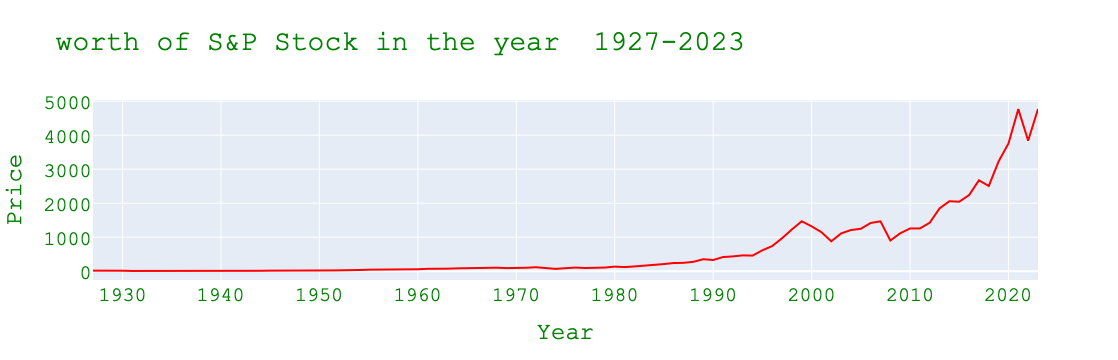

In [51]:
fig.update_traces(line_color="red", selector=dict(type='scatter'))

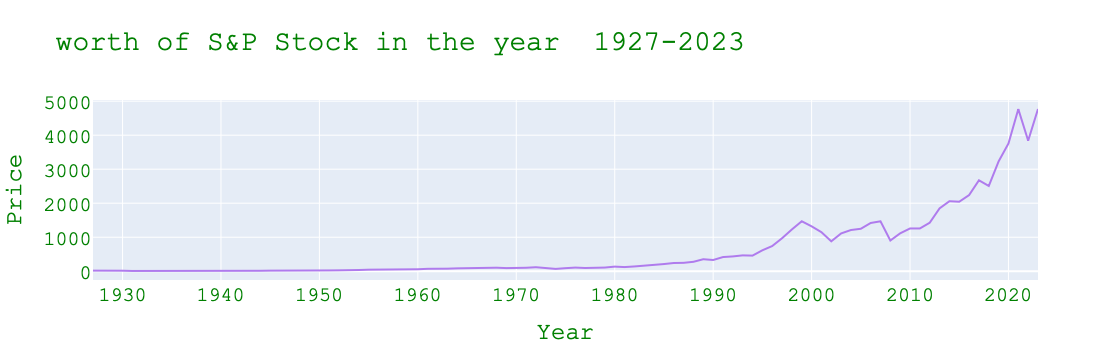

In [52]:
fig.update_traces(line_color="#AF7BED", selector=dict(type='scatter'))

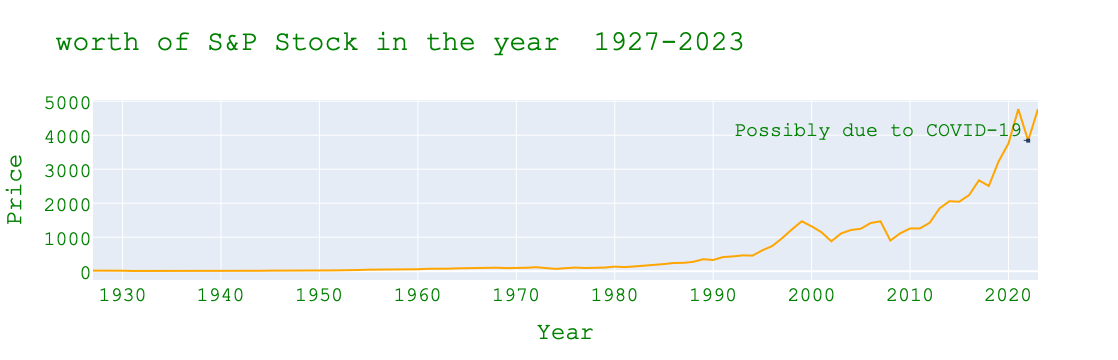

In [53]:
fig.add_annotation(
    x="2022",  
    y=3840.5,  
    text="Possibly due to COVID-19",  
    showarrow=True, 
    arrowhead=7, 
    ax=-150, 
    ay=-10, 
    hovertext="COVID-19 was a pandemic lasting from 2020 until 2023<br>This is me creating a second line<br>This is me creating a third line",  
    hoverlabel=dict(
        bgcolor="pink", 
        bordercolor="red", 
        font=dict(
            color="black" 
        )
    )
)
fig.update_traces(line_color="orange", selector=dict(type='scatter'))

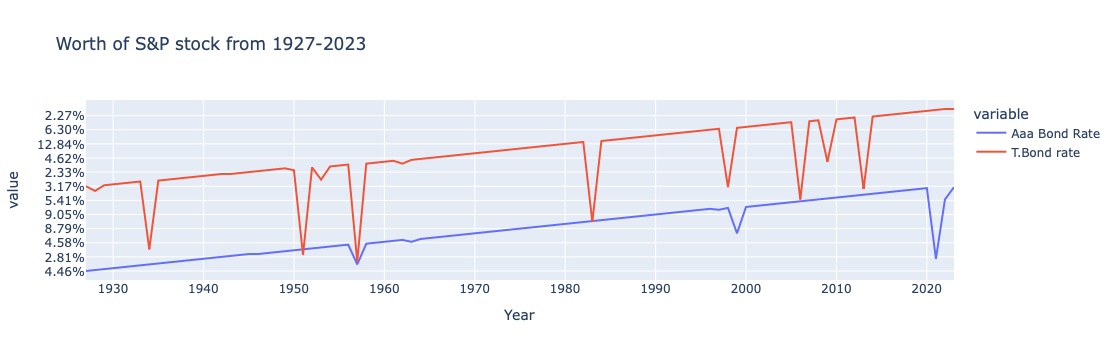

In [54]:

fig2 = px.line(SP, x="Year", y=["Aaa Bond Rate", "T.Bond rate"], title='Worth of S&P stock from 1927-2023')
fig2.show()

## Plotly Group 3

In [56]:
import plotly.express as px 
import pandas as pd

In [57]:
data = pd.read_csv('country_wise_latest.csv')

In [58]:
data.head()

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1                    5.25                 4171            709   
2                    6.17                23691           4282   
3                    6.48                  884             23   
4                   16.94                  749            201   

   1 week % increase             WHO Region  
0               2.07  Eastern Mediterranean  
1              17.00                 Europe  
2              18.07                 Africa  
3               2.60                 Europe  
4              26.84                 Africa

In [59]:
data.describe()

Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   187.000000     187.000000          187.000000             187.000000   
mean     28.957219     933.812834            3.019519              64.820535   
std     120.037173    4197.719635            3.454302              26.287694   
min       0.000000       0.000000            0.000000               0.000000   
25%       0.000000       0.000000            0.945000              48.770000   
50%       1.000000      22.000000            2.150000              71.320000   
75%       6.000000     221.000000            3.875000              86.885000   
max    1076.000000   33728.000000           28.560000             100.000000   

       Deaths / 100 Recovered  Confirmed last week  1 week change  \
count                  187.00         1.870000e+02     187.000000   
mean                      inf         7.868248e+04    9448.459893   
std                       NaN         3.382737e+05   47491.127684   
min                      0.00         1.000000e+01     -47.000000   
25%                      1.45         1.051500e+03      49.000000   
50%                      3.62         5.020000e+03     432.000000   
75%                      6.44         3.708050e+04    3172.000000   
max                       inf         3.834677e+06  455582.000000   

       1 week % increase  
count         187.000000  
mean           13.606203  
std            24.509838  
min            -3.840000  
25%             2.775000  
50%             6.890000  
75%            16.855000  
max           226.320000

In [60]:
data.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [61]:
data.drop_duplicates()

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0            10             18                3.50                  69.49   
1             6             63                2.95                  56.25   
2             8            749                4.16                  67.34   
3             0              0                5.73                  88.53   
4             1              0                4.32                  25.47   
..          ...            ...                 ...                    ...   
182           2              0                0.73                  35.33   
183           0              0               10.00                  80.00   
184           4             36               28.56                  49.26   
185           1            465                3.08                  61.84   
186           2             24                1.33                  20.04   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                      5.04                35526            737   
1                      5.25                 4171            709   
2                      6.17                23691           4282   
3                      6.48                  884             23   
4                     16.94                  749            201   
..                      ...                  ...            ...   
182                    2.08                 8916           1705   
183                   12.50                   10              0   
184                   57.98                 1619             72   
185                    4.97                 3326           1226   
186                    6.64                 1713            991   

     1 week % increase             WHO Region  
0                 2.07  Eastern Mediterranean  
1                17.00                 Europe  
2                18.07                 Africa  
3                 2.60                 Europe  
4                26.84                 Africa  
..                 ...                    ...  
182              19.12  Eastern Mediterranean  
183               0.00                 Africa  
184               4.45  Eastern Mediterranean  
185              36.86                 Africa  
186              57.85                 Africa  

[187 rows x 15 columns]

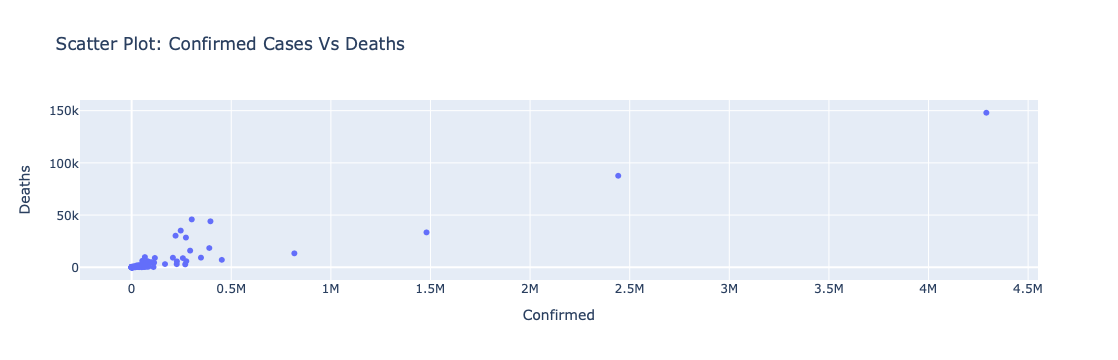

In [62]:
fig=px.scatter(data, x='Confirmed',y='Deaths', title='Scatter Plot: Confirmed Cases Vs Deaths')
fig.show()

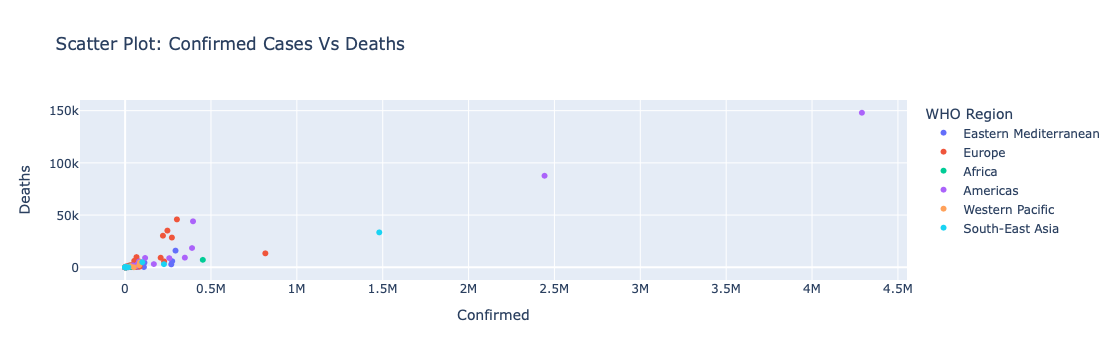

In [63]:
fig = px.scatter(data, x='Confirmed', y='Deaths',color='WHO Region',title='Scatter Plot: Confirmed Cases Vs Deaths')
fig.show()

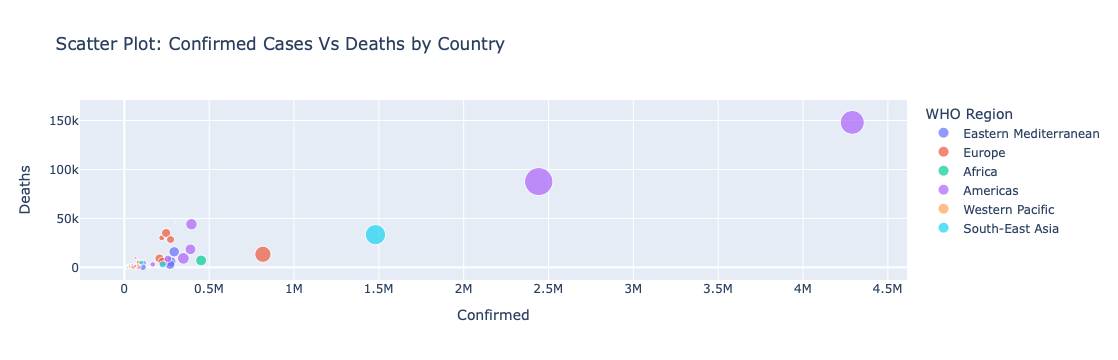

In [64]:
fig = px.scatter(data, x='Confirmed', y='Deaths',color='WHO Region',size='Recovered',title='Scatter Plot: Confirmed Cases Vs Deaths by Country')
fig.show()

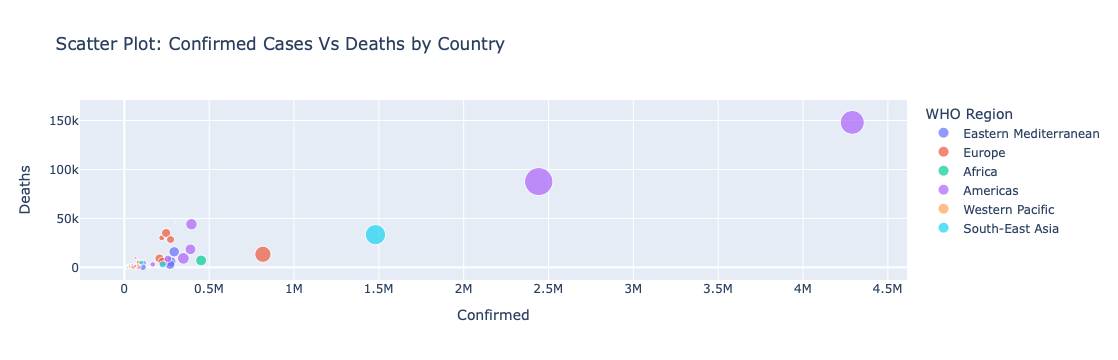

In [65]:
fig = px.scatter(data, x='Confirmed', y='Deaths',color='WHO Region',size='Recovered',hover_data=['Country/Region','Active', 'New cases'],
                title='Scatter Plot: Confirmed Cases Vs Deaths by Country')
fig.show()

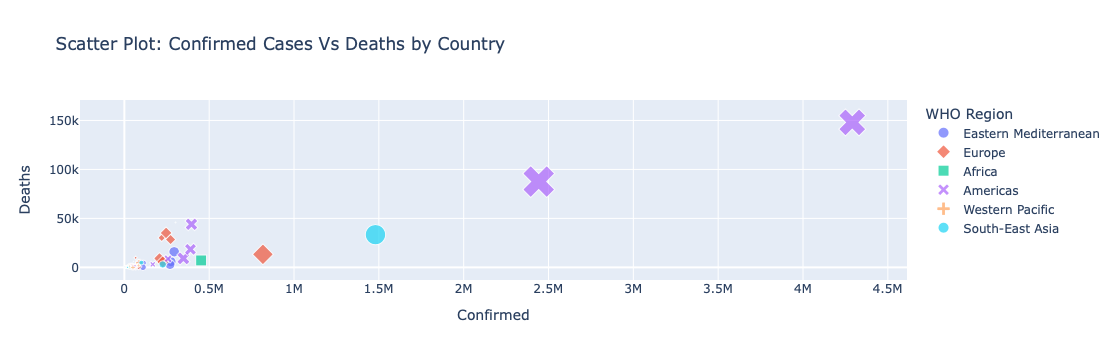

In [66]:
fig = px.scatter(data, x='Confirmed', y='Deaths',color='WHO Region',size='Recovered',hover_data=['Country/Region','Active','New cases'],
                title='Scatter Plot: Confirmed Cases Vs Deaths by Country',symbol='WHO Region')
fig.show()

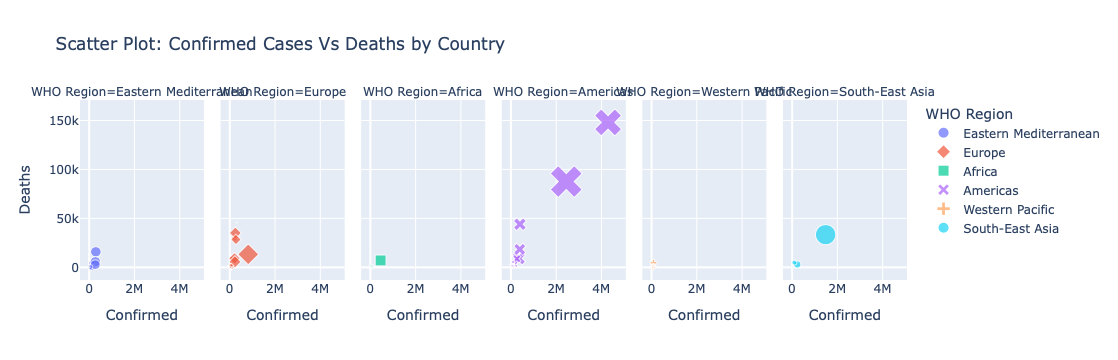

In [67]:
fig = px.scatter(data, x='Confirmed', y='Deaths',color='WHO Region',
                 size='Recovered',
                 hover_data=['Country/Region','Active', 'New cases'],
                title='Scatter Plot: Confirmed Cases Vs Deaths by Country',
                 symbol='WHO Region',
                 facet_col='WHO Region')
fig.show()